When we want to filter noise and have an idea about the trend of a time series, we usually apply **linear** or **exponential** moving average (MA) depends on the noise is time independent or not. the latter assumes current value is affected by last one, thus we can define the relation as

$$ v_t = \beta p_t + (1 - \beta)v_{t-1} $$

Where $p_t$ and $v_t$ are the pratical/weighted value at time $t$ respectively, $\beta$ is the weighting for current pratical value and thus $(1-\beta)$ is for the last weighted value.

## Recurrence Relation

Let's expand $v_{20}$

$$
\begin{align*}
v_{20} &= \beta p_{20} + (1-\beta) v_{19} \\
        &= \beta p_{20} + (1-\beta) [\beta p_{19} + (1-\beta) v_{18}] \\
        &= \beta p_{20} + \beta (1-\beta) p_{19} + (1-\beta)^2 [\beta p_{18} + (1-\beta) v_{17}] \\
        &= \cdots \\
        &= \beta [ p_{20} + (1-\beta) p_{19} + (1-\beta)^2 p_{18} + \cdots + (1-\beta)^k p_{20-k} ]
\end{align*}
$$

thus we get the recurrence relation
$$ v_t = \beta \vec{P} \cdot \vec{W} $$
where
$$
\begin{align*}
\vec{P} &= [p_t   &&,p_{t-1}         &&,p_{t-2}           &&\cdots  &&,p_1                   &&,p_0] \\
\vec{W} &= [\beta &&,\beta (1-\beta) &&,\beta (1-\beta)^2 &&\cdots  &&,\beta (1-\beta)^{t-1} &&,\beta (1-\beta)^t]
\end{align*}
$$

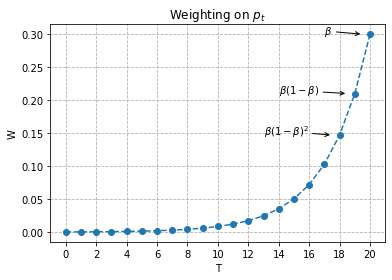

In [3]:
import matplotlib.pyplot as plt

beta = 0.3
steps = 20
T = range(0, 21)
W = [beta * (1-beta)**(steps-t) for t in T]
plt.plot(T, W, 'o--')
plt.annotate(r'$\beta$', xy=(T[-1]-0.5, W[-1]), xytext=(T[-1]-3, W[-1]), arrowprops={'arrowstyle': '->'})
plt.annotate(r'$\beta(1-\beta)$', xy=(T[-2]-0.5, W[-2]), xytext=(T[-2]-5, W[-2]), arrowprops={'arrowstyle': '->'})
plt.annotate(r'$\beta(1-\beta)^2$', xy=(T[-3]-0.5, W[-3]), xytext=(T[-3]-5, W[-3]), arrowprops={'arrowstyle': '->'})
plt.title("Weighting on $p_t$")
plt.xlabel("T")
plt.ylabel("W")
plt.xticks(range(0,21,2))
plt.grid(linestyle='--')
plt.show()

In this $\beta = 0.3$ sample, $v_{20}$ has a contribution from $p_{20}$ with factor 0.3 ($\beta$), and drop exponentially, 0.21 on $p_{19}$ and 0.05 on $p_{15}$ already.

## Discusstion on $\beta$

Using [Compound interest](https://en.wikipedia.org/wiki/Compound_interest) as an example, known that

$$ \lim_{n \to \infty} (1 + \frac{r}{n})^n = e^r $$

To get our previous formula, let $r = -1$ and $\beta = 1 / n$, then

$$ \lim_{\beta \to 0} (1 - \beta)^{\frac{1}{\beta}} = \frac{1}{e} \approx 0.3678 $$

Which means the weighting drop to about $1/3$ after $1/\beta$ periods. 

Unlike fixed window size in linear MA, we can easily define 1 week or 1 month MA. Exponential MA affacets by all previous elements. **By convention we use $1/e$ as a reference and says it's a $1/\beta$ period EMA.** e.g. To calculate 1 week EMA of stock price, we let $1/\beta = 5$ thus set $\beta$ to 0.2.